# Explaratory Data Analysis with Pandas and Matplotlib

In [0]:
# Import all of the essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

Matplotlib Basics

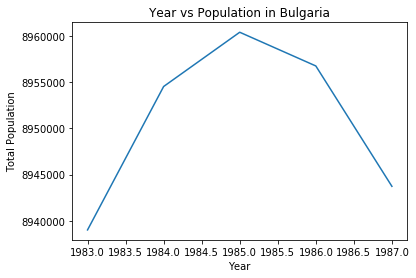

In [2]:
years = [1983, 1984, 1985, 1986, 1987]
total_populations = [8939007, 8954518, 8960387, 8956741, 8943721]

plt.plot(years, total_populations)
plt.title("Year vs Population in Bulgaria")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.show()

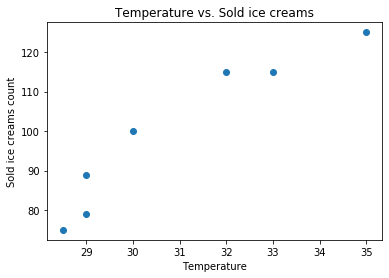

In [3]:
temp = [30, 32, 33, 28.5, 35, 29, 29]
ice_creams_count = [100, 115, 115, 75, 125, 79, 89]

plt.scatter(temp, ice_creams_count)
plt.title("Temperature vs. Sold ice creams")
plt.xlabel("Temperature")
plt.ylabel("Sold ice creams count")
plt.show()

#### Read and Explore Data 
Reading a dataset into the proprietary datastructure

Alternatives include
``` read_hdf
    read_excel
    read_pickle
    read_html
    read_json
    read_sql
    read_gbq
```

In [17]:
data=pd.read_csv('vgsales.csv',index_col=0,error_bad_lines=False)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [19]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [23]:
data['Year'].value_counts(dropna=False).sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
NaN        271
Name: Year, dtype: int64

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### There are null NaN values in place of Year 

There are multiple ways of handling this, either we could drop the null values using `dropna()` or fill the null values with values by using imputation techniques with `fillna()`. And also replace them with custom values based on conditions using `replace()`

In [25]:
data.isnull().any()

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [26]:
data[data['Year']==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


##### Fix the Typo

In [0]:
data.loc[5959, 'Year'] = 2010.0

In [32]:
data.loc[5959,]

Name            Imagine: Makeup Artist
Platform                            DS
Year                              2010
Genre                       Simulation
Publisher                      Ubisoft
NA_Sales                          0.27
EU_Sales                             0
JP_Sales                             0
Other_Sales                       0.02
Global_Sales                      0.29
Name: 5959, dtype: object

In [33]:
data['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [34]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [35]:
data['Publisher'].nunique()

578

In [36]:
data.groupby('Year').sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


Text(0.5, 1.0, 'Total Volume of Sales Globally')

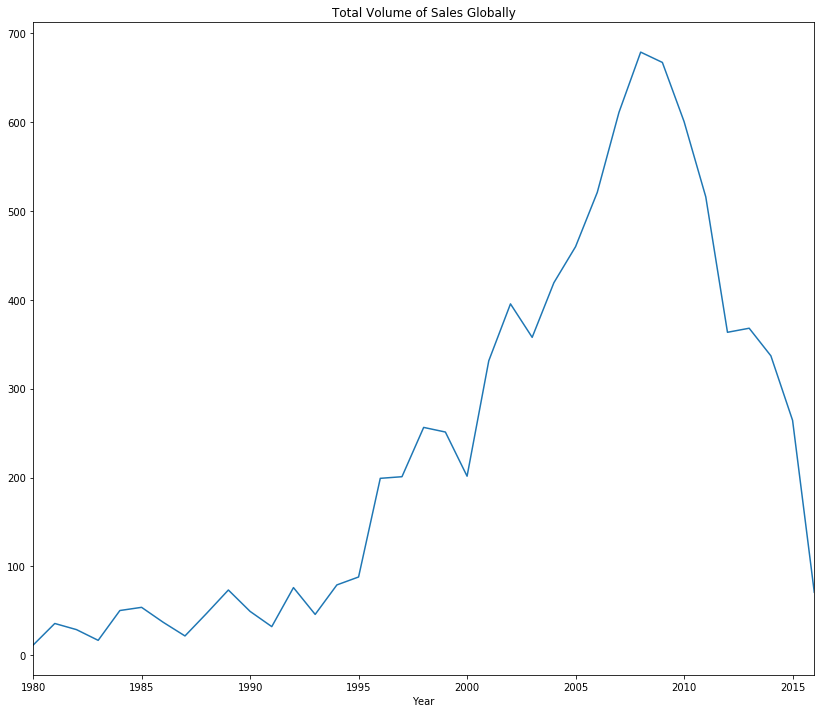

In [37]:
fig, (ax1) = plt.subplots(1, 1, sharex=True)

fig.set_figheight(12)
fig.set_figwidth(14)

data[data['Year']<2017].groupby('Year')['Global_Sales'].sum().plot(ax=ax1, subplots=True)
ax1.set_title('Total Volume of Sales Globally')

### The Overall Trend of Sales Globally by Type of the Genre 

In [38]:
grouped = data[(data['Year']>1996) & (data['Year']<2016)].groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()
grouped

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1997.0,27.58,4.96,11.76,5.69,21.85,5.89,31.91,21.79,22.17,9.65,30.02,7.71
1998.0,39.44,9.05,31.66,11.94,29.88,6.34,27.90,28.09,9.80,7.11,41.79,13.47
1999.0,27.78,7.60,14.26,20.65,20.82,1.36,37.27,49.09,12.25,11.44,30.29,18.46
2000.0,34.04,2.98,20.22,15.54,16.06,3.82,19.99,29.03,6.81,3.38,41.19,8.50
2001.0,59.39,9.12,18.12,16.40,39.28,8.00,55.81,22.06,24.77,19.54,51.43,7.55
2002.0,86.77,11.05,25.02,15.67,45.97,5.34,30.20,45.13,48.58,10.81,65.42,5.56
2003.0,67.93,2.14,23.73,23.82,42.89,2.42,52.19,30.28,27.14,21.21,56.11,7.99
2004.0,76.26,8.70,16.78,31.32,47.34,8.43,47.86,53.95,46.95,10.85,63.68,7.19
2005.0,85.69,8.53,19.72,61.24,23.56,20.45,56.42,28.55,41.60,49.27,59.54,5.37


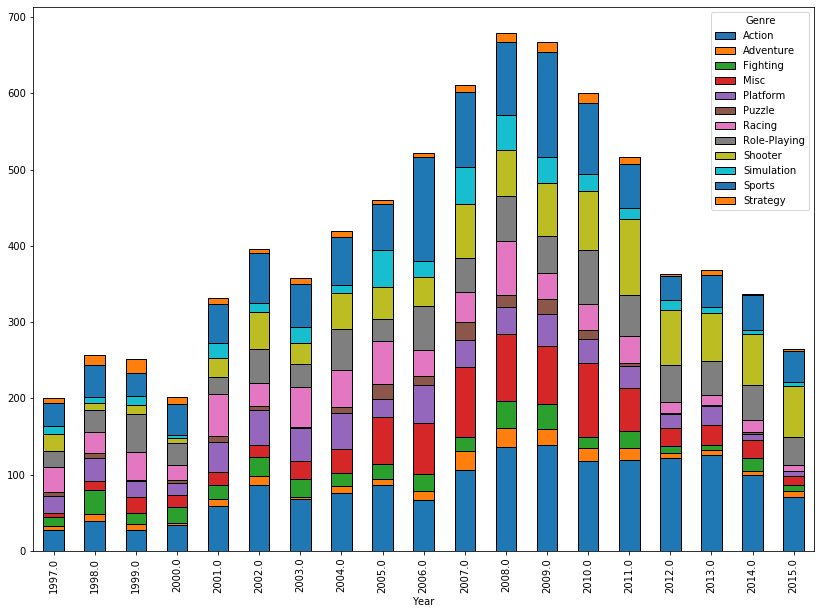

In [39]:
grouped.plot(kind='bar', stacked = True, figsize=(14,10))

### Which Genre's Size/Share did grow on yearly bases?

In [40]:
prop = grouped.divide(grouped.sum(axis=1), axis=0)
prop

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1997.0,0.137228,0.024679,0.058513,0.028311,0.108717,0.029306,0.158772,0.108419,0.110309,0.048015,0.149368,0.038362
1998.0,0.153780,0.035287,0.123445,0.046555,0.116505,0.024720,0.108785,0.109525,0.038211,0.027723,0.162943,0.052521
1999.0,0.110558,0.030246,0.056752,0.082183,0.082859,0.005413,0.148327,0.195368,0.048752,0.045529,0.120548,0.073467
2000.0,0.168883,0.014785,0.100318,0.077099,0.079679,0.018952,0.099176,0.144027,0.033786,0.016769,0.204356,0.042171
2001.0,0.179172,0.027514,0.054666,0.049477,0.118502,0.024135,0.168371,0.066552,0.074728,0.058950,0.155157,0.022777
2002.0,0.219382,0.027938,0.063258,0.039619,0.116227,0.013501,0.076355,0.114103,0.122826,0.027331,0.165403,0.014057
2003.0,0.189828,0.005980,0.066313,0.066564,0.119855,0.006763,0.145843,0.084616,0.075842,0.059271,0.156798,0.022328
2004.0,0.181870,0.020748,0.040018,0.074694,0.112900,0.020104,0.114140,0.128664,0.111970,0.025876,0.151869,0.017147
2005.0,0.186307,0.018546,0.042875,0.133148,0.051224,0.044462,0.122668,0.062073,0.090447,0.107123,0.129452,0.011675


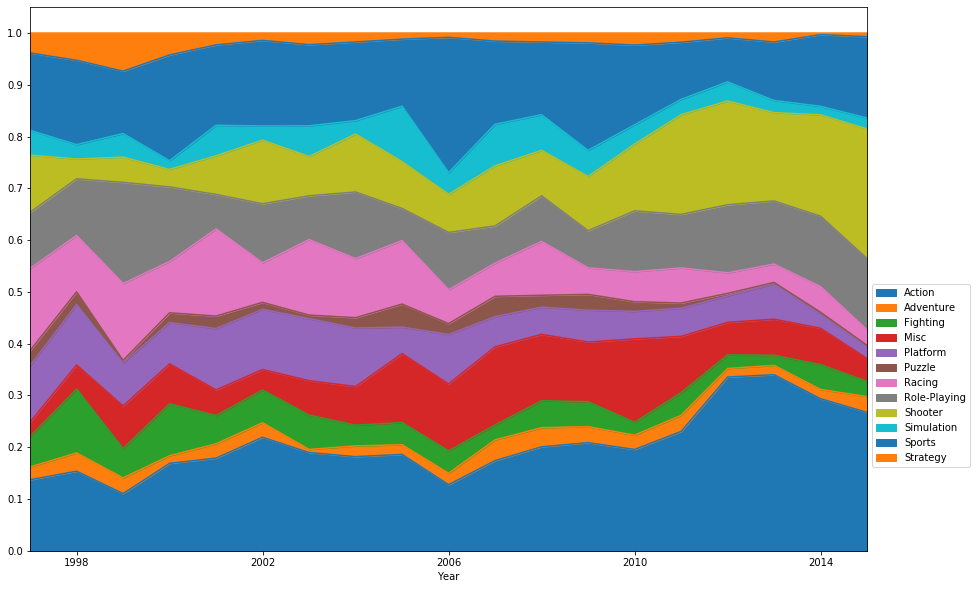

In [41]:
prop.plot(kind='area', stacked = True, figsize=(15,10), xticks=[1998, 2002, 2006, 2010, 2014], yticks=np.arange(0, 1.1, step=0.1))
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))

### Which Platform Does Have the Most VG Sales Across the Globe?

In [0]:
grouped = data[data['Year']<2017].groupby(['Platform']).agg({'Global_Sales': 'sum'})

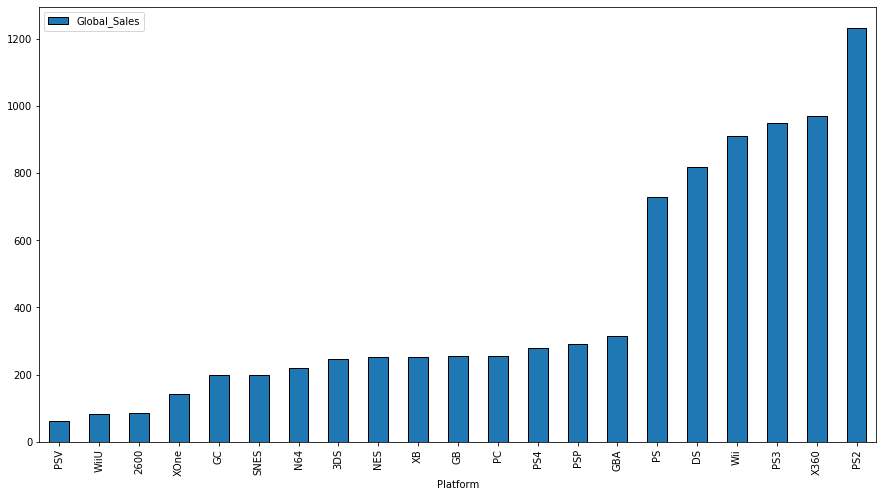

In [43]:
grouped[grouped['Global_Sales']>50].sort_values(by = 'Global_Sales').plot(kind='bar', figsize=(15,8))

### Which Video Game Does Have the Most Sales Across the Globe?

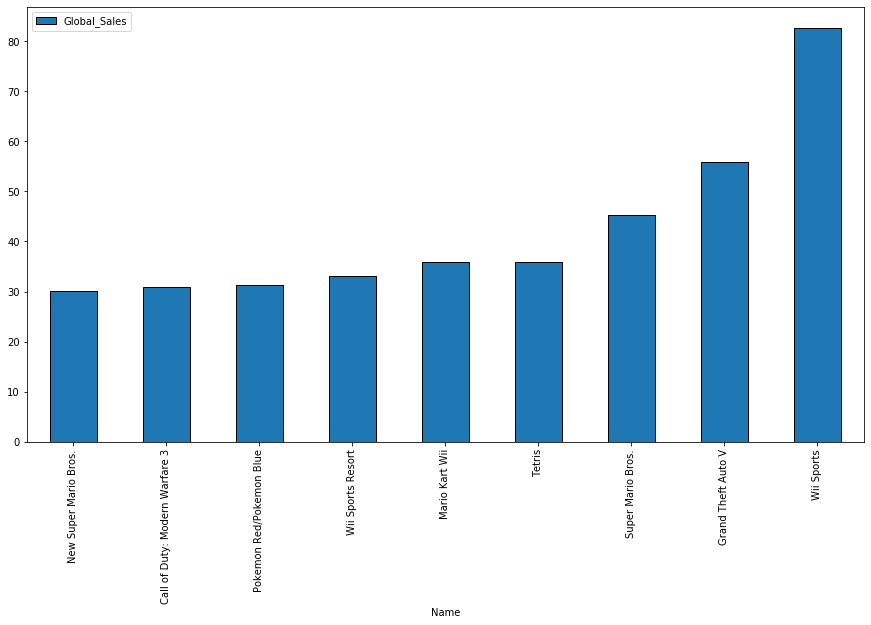

In [44]:
grouped = data[data['Year']<2017].groupby(['Name']).agg({'Global_Sales': 'sum'})
grouped[grouped['Global_Sales']>30].sort_values(by = 'Global_Sales').plot(kind='bar', figsize=(15,8))

### Magic EDA library 

In [49]:
!pip install pandas-profiling==2.3.0

In [51]:
import pandas_profiling
data=pd.read_csv('vgsales.csv',index_col=0)
data.profile_report(style={'full_width':True})

Output hidden; open in https://colab.research.google.com to view.